# LTAT.02.006 Andmeteaduse meetodid

## 4. praktikum - Jaotused 2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, geom, hypergeom, nbinom, poisson, zipf
from scipy.stats import beta, chi2, expon, gamma, lognorm, norm, uniform

Siin on lühike ülevaade enamlevinud tõenäosusjaotustest. Klikkige vastaval lingil, et avada detailsem lehekülg scipy dokumentatsioonist. Seejuures tähistab diskreetsetel jaotustel k ning pidevatel x jaotusest genereeritavat väärtust ning need ei ole parameetrid. Kõigil alltoodud jaotustel on 1 kuni 3 parameetrit.

Klassikalised diskreetsed jaotused:

-   Bernoulli jaotus ([`bernoulli`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html)): kas sündmus toimus (1) või mitte (0)?
-   Binoomjaotus ([`binom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)): juhuslik katse toimub n korda, õnnestumise tõenäosus on p. Mitu korda katse õnnestub? Näiteks mitu kirja tuleb 10 korda mündi viskamisel, $n = 10$ ja $p = 0.5$.
-   Poissoni jaotus ([`poisson`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)): see näitab sündmuse toimumiste arvu ajaühikus, kui on teada, et keskmiselt toimub ajaühikus $\lambda$ sündmust.
-   Negatiivne binoomjaotus ([`nbinom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html)): kui katse õnnestumise tõenäosus on $p$, siis mitu korda saab katse ebaõnnestuda, enne kui see jõuab $r$-ndat korda õnnestuda?
-   Geomeetriline jaotus ([`geom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html)): juhusliku katse õnnestumise tõenäosus on p. Mitu korda peab katset sooritama et saada esimene õnnestumine? Näiteks mitu korda peab täringut viskama et tuleks esimene kuus ($p = \frac{1}{6}$)?
-   Hüpergeomeetriline jaotus ([`hypergeom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html)): urnis on $N$ kuuli, nendest $K$ on mustad ja $N - K$ on valged. Sealt võetakse ilma tagasipanekuta välja $n$ kuuli. Väljavõetud kuulide seas olevate mustade kuulide arv on hüpergeomeetrilise jaotusega.
-   Zeta jaotus ([`zipf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zipf.html)): suvaliselt valitud sõna koht sageduse edetabelis.

Klassikalised pidevad jaotused:

-   Ühtlane jaotus ([`uniform`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)): Ühtlase jaotusega juhuslik suurus langeb ühesuguse tõenäosusega kõikjale vahemikus $[a, b]$.
-   Normaaljaotus ([`norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)): see kirjeldab selliseid juhuslikke suurusi, mis tekivad paljude sõltumatute ja sama jaotusega juhuslike suuruste summast.
-   Log-normaaljaotus ([`lognorm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html)): see kirjeldab selliseid juhuslikke suurusi, mis tekivad paljude sõltumatute ja sama jaotusega juhuslike suuruste korrutisest.
-   Eksponentjaotus ([`expon`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html)): kui ajaühikus toimuv sündmuste arv on Poissoni jaotusega, siis kahe sündumse vahele jääv aeg on eksponentjaotusega.
-   Gammajaotus ([`gamma`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html)): kui ajaühikus toimuv sündmuste arv on Poissoni jaotusega, siis aeg $n$-nda sündmuse toimumiseni on gammajaotusega.
-   Beetajaotus ([`beta`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html)): sellise jaotusega on $n$ ühtlasest jaotusest võetud punktide seas suuruselt $k$-ndal kohal olev väärtus.
-   Hii-ruut jaotus ([`chi2`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html)): juhuslikul katsel on $k$ võimalikku tulemust, tulemuste tõenäosused on $p_1,p_2,...,p_k$ ning me teeme $n$ katset. Katseseeria käigus vaatlesime $x_i$ korda tulemust $i$. Keskmiselt võiks tulemus $i$ esineda $np_i$ korda. Et eeldatavaid ja tegelikke tulemuste esinemiste sagedusi võrrelda, arvutame hii-ruut statistiku:

$$ \chi^2 = \sum\_{i=1}^k \frac{(np_i - x_i)^2}{np_i} $$

Seda, kui palju võib arv $\chi^2$ kõikuda, näitabki hii-ruut jaotus. Kui see arv tuleb ebatavaliselt suur või väike, näitab see seda, et me ei ole tulemuste tõenäosuseid $p_1,...,p_k$ õigesti hinnanud.


Järgnev abifunktsioon aitab meil diskreetsest jaotusest genereeritud andmeid võrrelda mõne klassikalise jaotuse tõenäosusfunktsiooniga (`pmf` - _probability mass function_). Selle jaoks tuleb andmed visualiseerida tulpdiagrammina selliselt, et väärtuste sagedused on teisendatud tõenäosusteks. Tõenäosusfunktsiooni arvutamiseks on vaja luua jaotuse objekt scipy teegist.


In [3]:
def võrdlev_joonis_diskreetne(andmed, scipy_jaotus):
    # loeme kokku sagedused ning teisendame tõenäosusteks
    sagedused = np.bincount(andmed)
    tõenäosused = sagedused / len(andmed)

    # Joonistame andmed tupldiagrammina
    x_telg = range(0, max(andmed)+1)
    plt.bar(x_telg, tõenäosused, color='orange')

    # Joonistame jaotuse tõenäosusfunktsiooni
    plt.plot(x_telg, scipy_jaotus.pmf(x_telg), '-o', color='blue')

    plt.show()

Pidevast jaotusest genereeritud andmete puhul tuleks tupldiagrammi asemel kasutada histogrammi. Et histogramm sageduste asemel tõenäosusi näitaks, on vaja parameetrit `density=True`. Jaotuse kuju paremaks uurimiseks võib ka muuta `bins` parameetrit (vahemike arv). Tõenäosusfunktsiooni asemel on tihedusfunktsioon (`pdf` - _probability density function_).


In [4]:
def võrdlev_joonis_pidev(andmed, scipy_jaotus, bins=15):
    # Joonistame andmed histogrammina
    plt.hist(andmed, bins=bins, density=True, color="orange")

    # Joonistame tihedusfunktsiooni.
    x_telg = np.linspace(0, max(andmed), 1000)
    plt.plot(x_telg, scipy_jaotus.pdf(x_telg), color='blue')

    plt.show()

# Ülesanne 1 - andmete genereerimisprotsessi äratundmine

Ilma andmeid reaalselt genereerimata arva ära, mis klassikaliste tõenäosusjaotuste perekonda allpool kirjeldatud jaotused võiks kuuluda.


(a) Genereeri palju andmestikke ühtlasest pidevast jaotusest vahemikus [0,1], igas andmestikus 10 andmepunkti.


In [5]:
ühtlased_andmestikud = [uniform.rvs(size=10) for _ in range(1000)]

(a1) Võta igast andmestikust suuruselt kolmas väärtus (ehk väiksuselt kaheksas). Mis jaotuse need väärtused moodustavad?


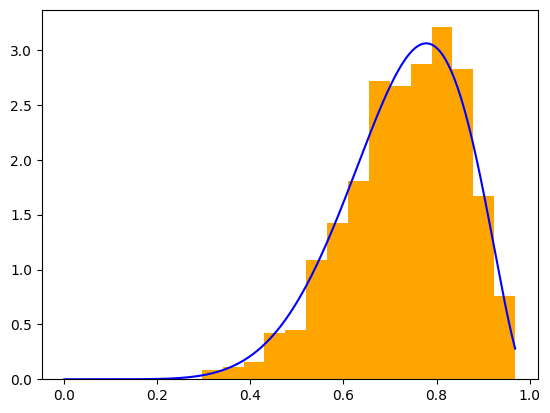

In [8]:
kolmandad = [
    sorted(andmestik)[7]
    for andmestik in ühtlased_andmestikud
]
jaotus = beta(8, 3)
võrdlev_joonis_pidev(kolmandad, jaotus)

(a2) Loe kokku vahemikku [0.1,0.9] jäävate punktide arv igas andmestikus. Mis jaotuse need punktide arvud moodustavad?


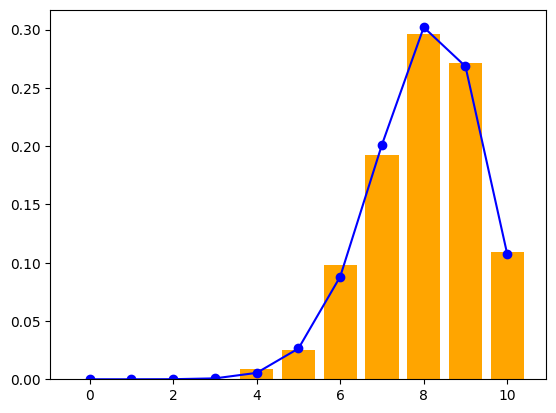

In [12]:
jääb_vahemikku = [
    np.sum(np.logical_and(andmestik >= 0.1, andmestik <= 0.9))
    for andmestik in ühtlased_andmestikud
]
jaotus = binom(10, 0.8)
võrdlev_joonis_diskreetne(jääb_vahemikku, jaotus)

(b) Genereeri palju järjestatud andmestikke (järjendeid) 1000-st elemendist, kus iga element on jaotusega Bernoulli(0.1)


In [13]:
bernoulli_andmestikud = [
    bernoulli.rvs(size = 1000, p = 0.1)
    for _ in range(10000)
]

(b1) Liida igas andmestikus kõik arvud kokku. Ligikaudu mis jaotusega on saadud summad?


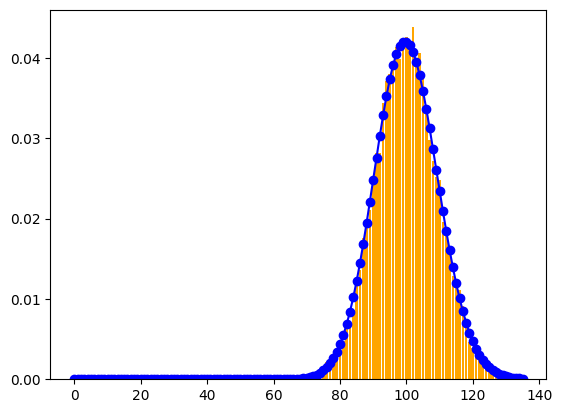

In [15]:
summad = [np.sum(andmestik) for andmestik in bernoulli_andmestikud]
jaotus = binom(1000, 0.1)
võrdlev_joonis_diskreetne(summad, jaotus)

(b2) Igas andmestikus loe kokku mitme nulliga see algab. Mis jaotusega on nende nullide arvud?


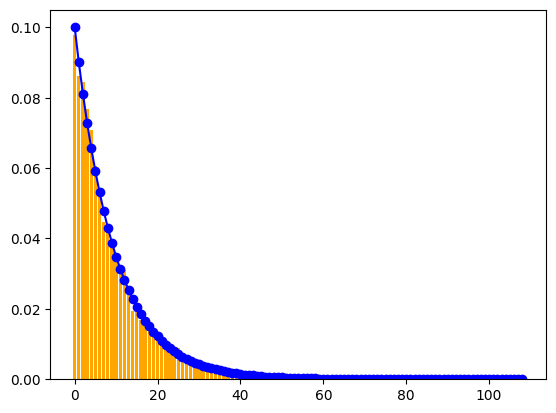

In [21]:
mitunulli = np.zeros(len(bernoulli_andmestikud), dtype=int)

for i in range(len(bernoulli_andmestikud)):
    andmestik = bernoulli_andmestikud[i]

    for j in range(len(andmestik)):
        if andmestik[j] == 1:
            mitunulli[i] = j
            break

jaotus = geom(0.1, -1)
võrdlev_joonis_diskreetne(mitunulli, jaotus)

(b3) Igas andmestikus loe kokku mitu nulli on enne kui tuleb kolmas 1. Mis jaotusega on nende nullide arvud?


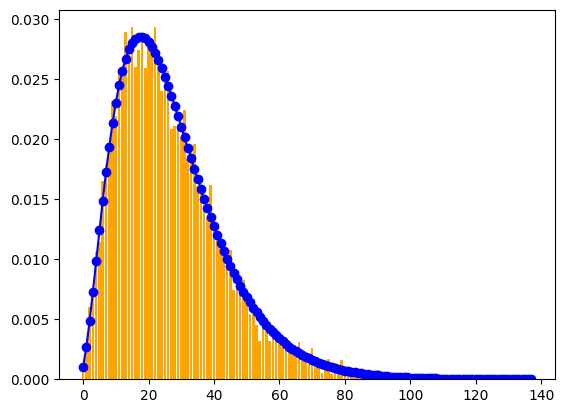

In [36]:
mitunulli = []

for andmestik in bernoulli_andmestikud:
    nullid = 0
    ühed = 0

    for i in andmestik:
        if i == 0:
            nullid += 1
        elif i == 1:
            ühed += 1
            if ühed == 3:
                break

    mitunulli.append(nullid)

jaotus = nbinom(3, 0.1)
võrdlev_joonis_diskreetne(mitunulli, jaotus)

(c) Genereeri 10000 andmepunkti ühtlasest pidevast jaotusest vahemikus [0,1].


In [37]:
ühtlane = uniform().rvs(10000)

(c1) Arvuta naaberpunktide (sorteeritud andmestikus järjestikuste punktide) vahelised kaugused. Ligikaudu mis jaotusega need kaugused on?


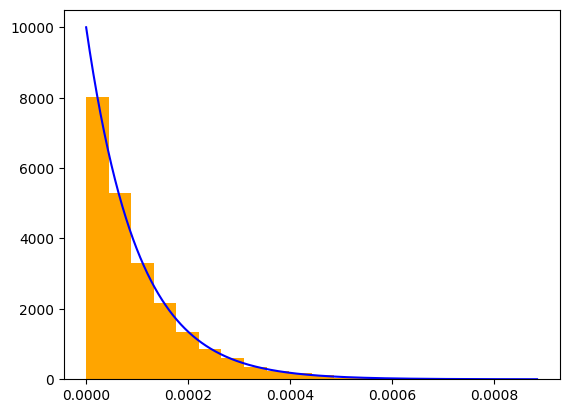

In [51]:
järjestatud = np.sort(ühtlane)
järjestatud2 = np.roll(järjestatud, 1)
vahed = (järjestatud-järjestatud2)[1:]

jaotus = expon(scale = 1/10000)
võrdlev_joonis_pidev(vahed, jaotus, bins=20)

(c2) Arvuta üksteisest 10 andmepunkti kaugusel olevate punktide vahelised kaugused. Ligikaudu mis jaotusega need kaugused on?


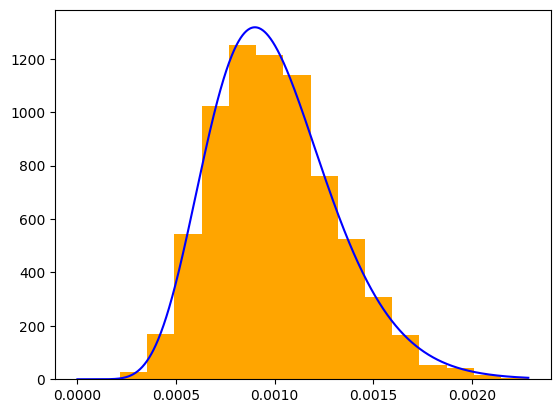

In [ ]:
järjestatud = np.sort(ühtlane)
järjestatud2 = np.roll(järjestatud, 10)
vahed = (järjestatud-järjestatud2)[10:]


jaotus = gamma(a=10, scale=1/10_000)
võrdlev_joonis_pidev(vahed, jaotus)

(d) Genereeri palju andmestikke ühtlasest pidevast jaotusest vahemikus [0,1], igas andmestikus 10000 andmepunkti. Igas andmestikus loe kokku vahemikku [0.123, 0.124] jäävate punktide arv. Ligikaudu mis jaotusega nende punktide arv on?


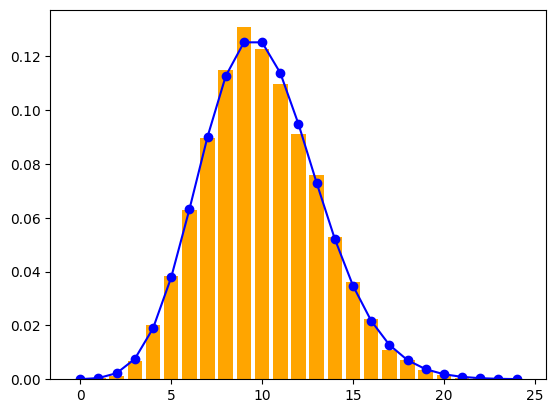

In [58]:
lõigus_arve = []
for i in range(10000):
  jaotus = uniform().rvs(10000)
  arv_on_vahemikus = np.logical_and(jaotus>=0.123, jaotus<=0.124)
  lõigus_arve.append(np.sum(arv_on_vahemikus))

#jaotus = binom(10_000, 0.001)
jaotus = poisson(10_000*0.001)
võrdlev_joonis_diskreetne(lõigus_arve, jaotus)

(e) Genereeri palju andmestikke ühtlasest pidevast jaotusest vahemikus [0.9, 1.1], igas andmestikus 100 andmepunkti. Leia iga andmestiku andmepunktide korrutis. Mis jaotuse need korrutised moodustavad?


AttributeError: 'ellipsis' object has no attribute 'pdf'

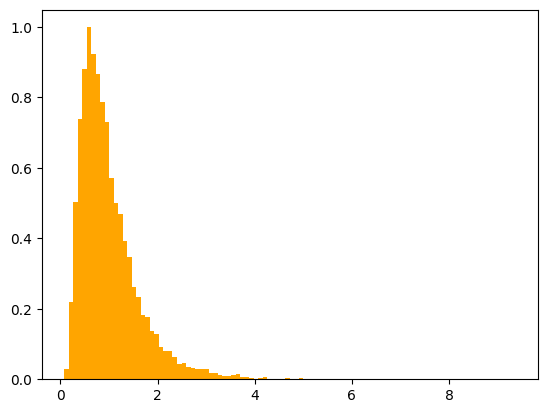

In [ ]:
korrutised = [
    np.prod(
        uniform(0.9, 0.2).rvs(100)
    )
    for _ in range(10000)
]
log_korrutised = np.log(korrutised)

jaotus = lognorm()
võrdlev_joonis_pidev(korrutised, jaotus, bins=100)

# Ülesanne 2


Mis jaotusega võiks modelleerida allkirjeldatud juhuslikke suuruseid? Vastusena võiks anda klassikalise tõenäosusjaotuse perekonna (näiteks 'normaaljaotus'), aga parameetrite väärtused nagu näiteks keskväärtus või dispersioon vms pole otseselt tähtsad. Õige vastus pole ilmselt enamikel juhtudel üheselt määratud. Soovi korral võib mõnel juhul üldkogumit enne vastamist kitsendada. Mõnel juhul võib vaja minna ka segujaotust mitmest klassikalisest jaotusest.


### 'Standardne' mõttekäik

1. lõplik või lõpmatu arv variante
2. võimalikud väärtused
3. diskreetne või pidev?
4. sõltuvused eri vaadeldud väärtuste vahel (sõltuvus võib üsna hägune olla kohati)

mõelda generatiivse protsessi peale


<font color='purple'>(a) Täiskasvanud inimese pikkus Eestis.</font>


<font color='purple'>(b) Rosinate arv saias ühel pagaril.</font>


<font color='purple'>(c) Kohalolevate õpilaste arv ühes konkreetses klassis.</font>


<font color='purple'>(d) Ilma väävlita praak-tikkude arv ühe seeria tikutoosis. </font>


<font color='purple'>(e) Telefonikõnede arv 10 ostja leidmiseks mingile tootele.</font>


<font color='purple'>(f) Sipelgate arv kuklaste pesas Eestis.</font>


<font color='purple'>(g) Raamatu lehekülgede arv raamatukogus.</font>


<font color='purple'>(h) Mittevõitvate loteriipiletite arv enne esimest võitu.</font>


<font color='purple'>(i) Usside arv kokku kõikides õunades ühel puul.</font>


<font color='purple'>(j) Mängu kestvus ühes arvutimängus, kus on antud 3 elu.</font>


<font color='purple'>(k) Krediitkaardi saldo ühe panga klientide seas.</font>


<font color='purple'>(l) Kõige päikeserohkem päev käesolevas nädalas.</font>


<font color='purple'>(m) Ühe konkreetse toidupoe päevane külastajate arv.</font>


<font color='purple'>(n) Ühe konkreetse toidupoe päevane käive.</font>


<font color='purple'>(o) Vigade arv tarkvara 1000-realistel tükkidel.</font>


<font color='purple'>(p) Aeg kahe infoliinile tehtud kõne vahel.</font>


<font color='purple'>(q) Päevade arv järgmise äikeseni.</font>


<font color='purple'>(r) Väravate arv jalgpallimängus Inglismaa kõrgliigas.</font>


<font color='purple'>(s) Liiklusõnnetuste arv päevas ühel ristmikul.</font>


<font color='purple'>(t) Puude pikkus Eestis.</font>


<font color='purple'>(u) Pihlakate arv pihlapuul.</font>


<font color='purple'>(v) Punaste autode arv parklas keskööl.</font>


<font color='purple'>(w) Palkade suuruse jaotus Eestis.</font>


<font color='purple'>(x) Inimese eluiga aastates Eestis.</font>


<font color='purple'>(y) Elanike arv hoones Tartus.</font>


<font color='purple'>(z) Inimeste arv Tallinnast õhkutõusvas lennukis.</font>
